D:\Users\ouyangqq\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
D:\Users\ouyangqq\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['simSun'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


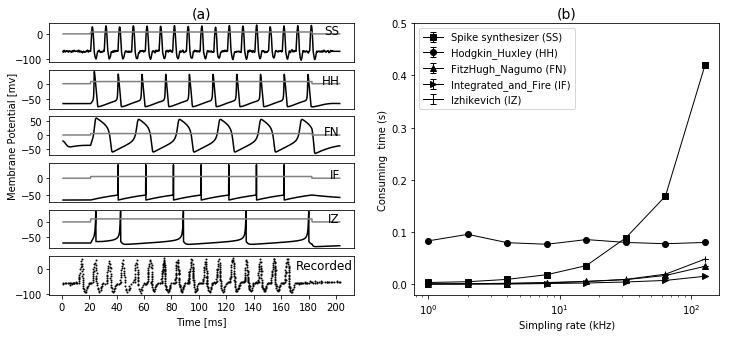

In [2]:
from sys import path
path.append(r'comparsion/interactive_neuron_model_simulator-master/Models/') 
import matplotlib.pyplot as plt
import FitzHugh_Nagumo_Interactive as FN
import Hodgkin_Huxley_Interactive as HH
import Izhikevich_Interactive as Iz
import LIF_Interactive as IF
import Spiking_synthezier as SS
import numpy as np


rec_wave=np.loadtxt('../data/ap.txt')


fig = plt.figure("Spiking Neurons", figsize=(12,5))


def consuming_time_acquiring(sampling_rate,srate_c,repeat_c):
    T=200   #ms
    dt=1/float(sampling_rate) #ms

    tc=SS.spiking_synthesizer(T,dt)
    Tc_buf[0,srate_c,repeat_c]=tc[0]


    tc=HH.start_HH_sim(T,dt)
    Tc_buf[1,srate_c,repeat_c]=tc[0]

    tc=FN.start_FN_sim(T,dt)
    Tc_buf[2,srate_c,repeat_c]=tc[0]

    tc=IF.start_LIF_sim(T,dt)
    Tc_buf[3,srate_c,repeat_c]=tc[0]
    
    
    tc=Iz.start_IZ_sim(T,dt)
    Tc_buf[4,srate_c,repeat_c]=tc[0]


def plot_the_action_potential_of_different_spiking_neurons(frows,fcol,sampling_rate):
    T=200   #ms
    dt=1/float(sampling_rate) #ms
    
    tc=SS.spiking_synthesizer(T,dt)

    plt.subplot(frows,fcol,1*fcol-1)
    plt.title('(a)',fontsize=14)
    plt.plot(tc[1][0], tc[1][2], color='k',label="Membrane Potential")
    plt.plot(tc[1][0], tc[1][1],'-' , color='gray', label="Applied Current")
    plt.xticks([],fontsize=11,color='none')
    plt.text(0.2,0,"SS",ha='right',fontsize=12)

    tc=HH.start_HH_sim(T,dt)
    plt.subplot(frows,fcol,2*fcol-1)
    plt.xticks([],fontsize=11,color='none')
    plt.plot(tc[1][0], tc[1][2], color='k',label="Membrane Potential")
    plt.plot(tc[1][0], tc[1][1],'-' , color='gray', label="Applied Current")
    plt.text(200,0,"HH",ha='right',fontsize=12)
    
    tc=FN.start_FN_sim(T,dt)
    plt.subplot(frows,fcol,3*fcol-1)
    plt.plot(tc[1][0], tc[1][2], color='k',label="Membrane Potential")
    plt.plot(tc[1][0], tc[1][1],'-' , color='gray', label="Applied Current")
    plt.xticks([],fontsize=11,color='none')
    plt.ylabel("Membrane Potential [mv]",fontsize=10)
    plt.text(200,0,"FN",ha='right',fontsize=12)


    tc=IF.start_LIF_sim(T,dt)
    plt.subplot(frows,fcol,4*fcol-1)
    plt.plot(tc[1][0], tc[1][2], color='k',label="Membrane Potential")
    plt.plot(tc[1][0], tc[1][1],'-' , color='gray', label="Applied Current")
    plt.xticks([],fontsize=11,color='none')
    plt.text(0.2,0,"IF",ha='right',fontsize=12)
    
    
    tc=Iz.start_IZ_sim(T,dt)
    plt.subplot(frows,fcol,5*fcol-1)
    plt.plot(tc[1][0], tc[1][2], color='k',label="Membrane Potential")
    plt.plot(tc[1][0], tc[1][1],'-' , color='gray', label="Applied Current")
    plt.xticks([],fontsize=11,color='none')
    plt.text(200,0,"IZ",ha='right',fontsize=12)

    
    plt.subplot(frows,fcol,6*fcol-1)
    plt.plot(rec_wave[:,0],rec_wave[:,1],'k.',markersize=2,label=u'rec_wave')
    plt.xticks([0,20,40,60,80,100,120,140,160,180,200],fontsize=10,color='k')
    plt.text(212,0,"Recorded",ha='right',fontsize=12)
    plt.xlabel("Time [ms]",fontsize=10)


ratesets=np.array([1,2,4,8,16,32,64,128])

repeats=1
Tc_buf=np.zeros([5,ratesets.size,repeats])
for srate_c in range(ratesets.size):
    for repeat_c in range(repeats):
        consuming_time_acquiring(ratesets[srate_c],srate_c,repeat_c)
np.save('data/tc_buf.npy',Tc_buf) 

#-------------plot Fig.8(a) --------
plot_the_action_potential_of_different_spiking_neurons(6,2,10)
     

# -------------plot Fig.8(b)------
plt.subplot(1,2,2)
plt.title('(b)',fontsize=14)
Tc_buf=np.load(r"data/tc_buf.npy")*0.5
Tc_buf1=np.zeros(Tc_buf[:,:,0].shape)  
Ter_buf1=np.zeros(Tc_buf[:,:,0].shape)  
colorbuf=['deeppink','brown','purple','orange','c']
 
def plot_f():
    for i in range(ratesets.size):
        Tc_buf1[0,i]=np.average(Tc_buf[0,i,:])
        Tc_buf1[1,i]=np.average(Tc_buf[1,i,:])
        Tc_buf1[2,i]=np.average(Tc_buf[2,i,:])
        Tc_buf1[3,i]=np.average(Tc_buf[3,i,:])
        Tc_buf1[4,i]=np.average(Tc_buf[4,i,:])
        Ter_buf1[0,i]=np.std(Tc_buf[0,i,:])
        Ter_buf1[1,i]=np.std(Tc_buf[1,i,:])
        Ter_buf1[2,i]=np.std(Tc_buf[2,i,:])
        Ter_buf1[3,i]=np.std(Tc_buf[3,i,:])
        Ter_buf1[4,i]=np.std(Tc_buf[4,i,:])
    plt.errorbar(ratesets,Tc_buf1[0,:],yerr=Ter_buf1[0,:],label=u'Spike synthesizer (SS)',fmt='ks-',linewidth=1,capsize=3)
    plt.errorbar(ratesets,Tc_buf1[1,:],yerr=Ter_buf1[1,:],label=u'Hodgkin_Huxley (HH)',fmt='ko-',linewidth=1,capsize=3)
    plt.errorbar(ratesets,Tc_buf1[2,:],yerr=Ter_buf1[2,:],label=u'FitzHugh_Nagumo (FN)',fmt='k^-',linewidth=1,capsize=3)
    plt.errorbar(ratesets,Tc_buf1[3,:],yerr=Ter_buf1[3,:],label=u'Integrated_and_Fire (IF)',fmt='k>-',linewidth=1,capsize=3)
    plt.errorbar(ratesets,Tc_buf1[4,:],yerr=Ter_buf1[4,:],label=u'Izhikevich (IZ)',fmt='k+-',linewidth=1,capsize=3)
    plt.xticks([1,10,128])  
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
    plt.xscale('log')
    plt.xlabel(u"Simpling rate (kHz)", fontsize=10)
    plt.ylabel(u"Consuming  time (s)", fontsize=10)
    plt.legend(loc=0,prop={'family':'simSun','size':10}) 

plot_f()
#--------------------------------


filepath='saved_figs/'
plt.savefig(filepath+'csr.png',bbox_inches='tight', dpi=300)

